In [1]:
import numpy as np
import mpmath as mp

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import potts_renormalization as rg

# Renormalization group flow

In [2]:
q = 6

J = -2
K = 1

dtype = 'npf';
mp.mp.dps = 10;
mp.mp.pretty = False

potts = rg.PottsRenormalizationGroup(J, K, q, dtype)

In [9]:
n = 25
T = potts.transfer_matrix
T = potts.renormalize(T)
print(T, end='\n\n')

[[0.76854227 0.99999988 0.99999985 0.99999985 0.99999988 0.76854227]
 [0.99999995 0.76854227 0.99999988 0.99999988 0.76854227 0.99999995]
 [1.         0.99999996 0.76854227 0.76854227 0.99999996 1.        ]
 [1.         0.99999996 0.76854227 0.76854227 0.99999996 1.        ]
 [0.99999995 0.76854227 0.99999988 0.99999988 0.76854227 0.99999995]
 [0.76854227 0.99999988 0.99999985 0.99999985 0.99999988 0.76854227]]



# Phase diagram calculations

In [43]:
%%time

n = 25

dtype = 'npf';
mp.mp.dps = 10;

num = 503
J_values = np.linspace(start=-2, stop=2, num=num)
K_values = np.linspace(start=-1, stop=2, num=num)

disorder = []
orderA = []
orderB = []
orderC = []
other = []

for i, J in enumerate(J_values):

    for K in K_values:

        print("J = %.3f; K = %.3f" % (J, K), end='')
        print("\t\t\t", end='\r')

        potts = rg.PottsRenormalizationGroup(J, K, 6, dtype)
        T = potts.transfer_matrix
        T, phase = potts.phase(T, n)

        if phase == "D": # D: all 1
            disorder.append([J, K])

        elif phase == "OA": # OA: only main diagonal
            orderA.append([J, K])

        elif phase == "OB": # OB: only anti-diagonal
            orderB.append([J, K])
            
        elif phase == "OC": # OC: only main diagonal + anti-diagonal
            orderC.append([J, K])

        else: # ?
            other.append([J, K])

/Users/artun/Documents/GitHub/cubic-spin-systems/potts_model/matrix_manipulation.py:5: RuntimeWarning: invalid value encountered in divide
  return x / np.amax(x)


CPU times: user 53.4 s, sys: 3.07 s, total: 56.5 s
Wall time: 54 s


## Plot phase diagram

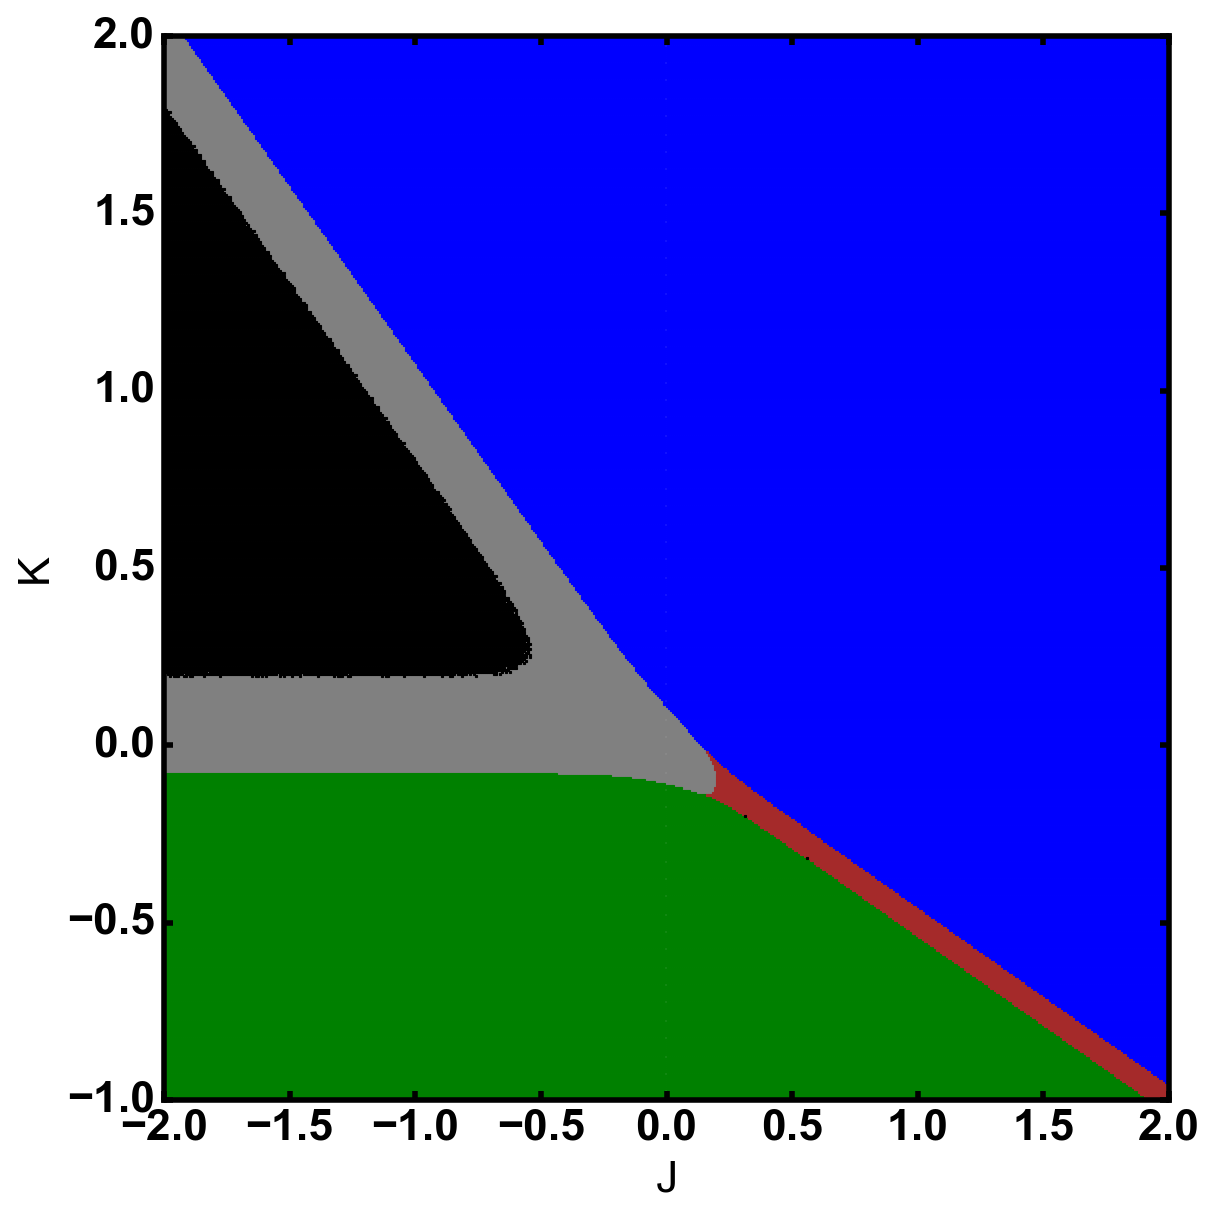

In [44]:
lw = 2.5
fs = 20
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), layout='tight')
fig.set_facecolor("white")
plt.rc(group="font", family="Arial", weight="bold", size=fs)
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)


c = {"disorder":"grey",
     "orderA":"blue",
     "orderB":"green",
     "orderC":"brown",
     "other":"black"}

args = {'ms':1, 'ls':"", 'marker':'s', 'alpha':1}
if disorder: ax.plot(np.array(disorder)[:,0], np.array(disorder)[:,1], mfc=c["disorder"], mec=c["disorder"], **args)
if orderA:   ax.plot(np.array(orderA)[:,0], np.array(orderA)[:,1], mfc=c["orderA"], mec=c["orderA"], **args)
if orderB:   ax.plot(np.array(orderB)[:,0], np.array(orderB)[:,1], mfc=c["orderB"], mec=c["orderB"], **args)
if orderC:   ax.plot(np.array(orderC)[:,0], np.array(orderC)[:,1], mfc=c["orderC"], mec=c["orderC"], **args)
if other:    ax.plot(np.array(other)[:,0], np.array(other)[:,1], mfc=c["other"], mec=c["other"], **args)

#ax.axis([-2,2, -2,2])
ax.tick_params(axis="both", direction="in", width=lw, length=4, labelsize=fs)
ax.set_xlabel("J")
ax.set_ylabel("K")
plt.show()